In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("heart_diseases.csv")

In [5]:
print(df.head())

        age  blood_pressure  cholesterol  heart_rate   glucose       BMI  \
0  2.456902        0.975120    -0.677162   -1.810549 -0.012247  0.814707   
1  1.631936       -1.594428     1.237816    2.511700 -1.713135 -1.103203   
2 -2.336756       -1.260884     0.404982    1.230513 -0.474945 -0.557277   
3  0.304699       -0.818221     0.595157   -0.338513  0.324166  0.151495   
4  1.100919       -1.534114    -1.124642    1.215244  0.120296 -0.532098   

    smoking   alcohol  exercise    stress  target  
0 -0.147057 -0.897254  0.075805  2.162517       0  
1 -0.599375  1.353872 -0.114540 -1.895498       1  
2  0.917862 -0.653329  1.765454 -1.615872       1  
3  2.092387 -0.130143  0.096996  0.370429       0  
4  1.277677  0.514439  0.711615 -0.848883       1  


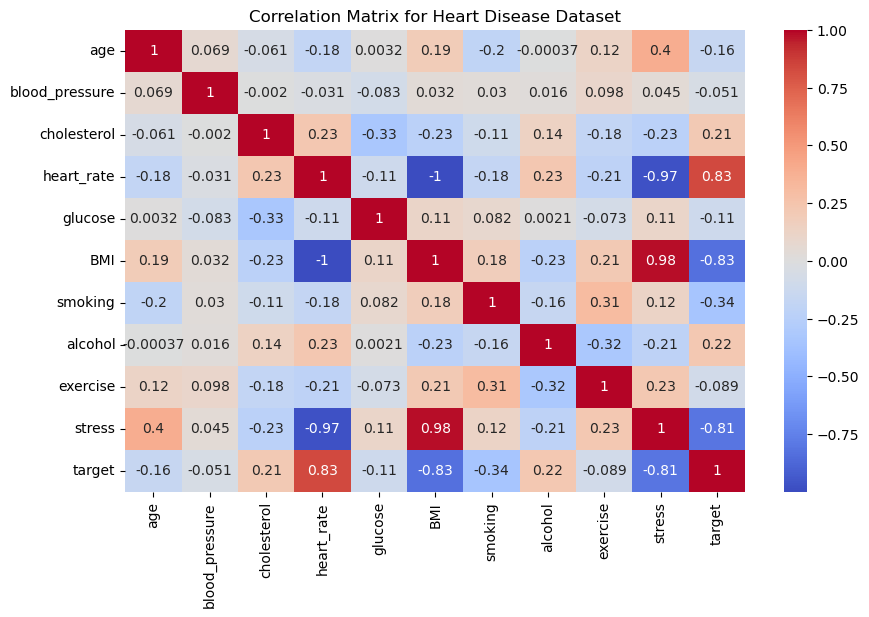

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Heart Disease Dataset")
plt.show()

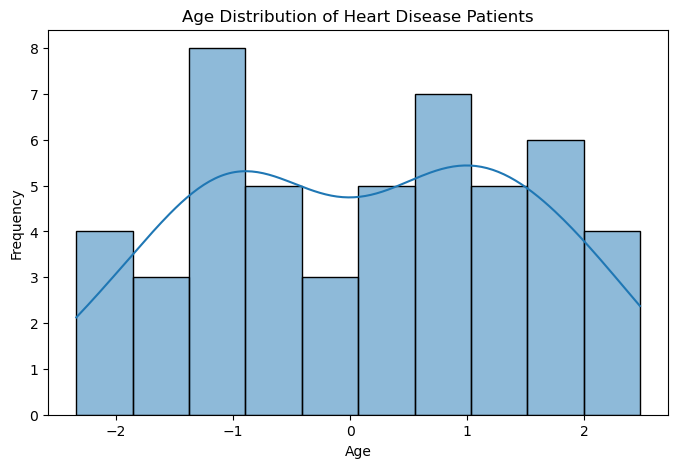

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("Age Distribution of Heart Disease Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [11]:
X = df.drop("target", axis=1)
y = df["target"]

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



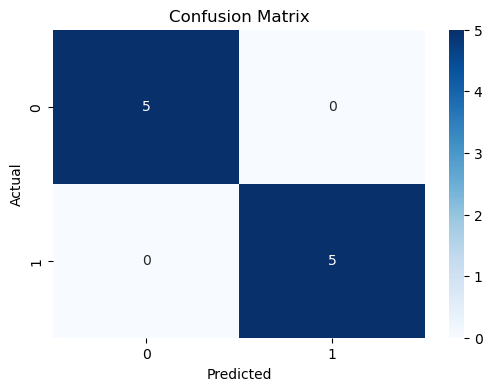

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()